# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from my_keys3 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
!C:\Users\krist\anaconda3\Scripts\pip.exe install kdtree

In [3]:
!pip install citipy

You should consider upgrading via the 'c:\users\krist\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#pair lat and lng together
lat_lngs = list(zip(lats, lngs))
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
#     print(lat_lng)
       
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    
    # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cape town
kisangani
puerto ayora
saint-georges
ribeira grande
chuy
port alfred
riyadh
duki
rikitea
pouebo
bilma
mattru
los llanos de aridane
grand river south east
mae hong son
kapaa
aklavik
port alfred
sabang
georgetown
kampene
taolanaro
rikitea
saint-philippe
codrington
chokurdakh
puerto ayora
tunduru
mount gambier
thompson
likhovskoy
rikitea
arraial do cabo
bandarbeyla
khuzhir
yuzhnyy
necochea
airai
taolanaro
dikson
qaanaaq
georgetown
pocone
moose factory
ushuaia
punta arenas
cartagena
lengshuijiang
port hardy
fernley
kapaa
talnakh
romanovskaya
mahanoro
castro
shasta lake
alofi
vaini
inyonga
pisco
new norfolk
samusu
ancud
cape town
port elizabeth
vaini
hermanus
carnarvon
kapaa
cape town
kapaa
severo-kurilsk
fraserburgh
la maddalena
bredasdorp
barrow
dubai
grand centre
new norfolk
castro
mayo
ushuaia
provideniya
saint-pierre
vyartsilya
isangel
saskylakh
chokurdakh
nikolskoye
hauterive
kapaa
bondo
mount gambier
bambous virieux
portland
mbaiki
tasiilaq
chokurdakh
port alfred
sri aman
c

katsuura
albany
ushuaia
palabuhanratu
rikitea
mangan
belushya guba
castro
rikitea
iberia
hermanus
hilo
geraldton
baghdad
lavrentiya
norrtalje
manta
rikitea
zeya
butaritari
mataura
phan thiet
jalu
airai
puerto ayora
rikitea
severo-kurilsk
atar
punta arenas
hobart
jamestown
timra
batticaloa
milcoiu
canillo
thompson
santa
albany
talnakh
cape town
bengkulu
nalut
upernavik
mataura
north bend
charkhi dadri
mahebourg
chulman
samusu
rikitea
kudahuvadhoo
rikitea
maniitsoq
butaritari
bonavista
yellowknife
ucluelet
port elizabeth
hambantota
arraial do cabo
trelew
bredasdorp
kruisfontein
shalinskoye
komsomolskiy
bethel
avarua
nishihara
taolanaro
new norfolk
bengkulu
vaini
albany
altay
yangambi
namatanai
hofn
guerrero negro
ushuaia
albany
albany
hilo
kodiak
codrington
ushuaia
avarua
souillac
carnarvon
bathsheba
bluff
carnarvon
nisia floresta
busselton
atbasar
saint george
capao da canoa
hermanus
feijo
kapaa
barrow
pangai
omboue
singkang
hunterville
marcona
saint-philippe
salisbury
dikson
katsuura
r

0

In [3]:
   # List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#pair lat and lng together
lat_lngs = list(zip(lats, lngs))
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
#     print(lat_lng)
       
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     print(city)
    
    
    # If the city is unique, then add it to a our cities list
    # so there might be duplicate cities that are near to the lng and lat that are nearby, so we have to avoid putting the duplicate cities.
    # so we do "if city not in cities(cities is a list)", then add this specific "city" to the list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# {"coord":{"lon":-82.4584,"lat":27.9475},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":86.25,"feels_like":96.13,"temp_min":81.95,"temp_max":89.55,"pressure":1015,"humidity":71},"visibility":10000,"wind":{"speed":1.99,"deg":42,"gust":7},"clouds":{"all":90},"dt":1632084047,"sys":{"type":2,"id":2005199,"country":"US","sunrise":1632050222,"sunset":1632094208},"timezone":-14400,"id":4174757,"name":"Tampa","cod":200}

#***Save all the result inside this "city_data[]" list, so we use this "city_data[]" to run the rest of the code, instead of requesting from API each time, or you'll use up the free API very fast.
city_data=[]

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for city in cities:
    print('processing {}'.format(city))
    
    city_url = url + '&q='+ city
#     print(city_url)
    city_weather = requests.get(city_url).json()
    city_data.append(city_weather)
    

print("done")
    
    


processing port alfred
processing mataura
processing blagoyevo
processing thompson
processing dikson
processing beringovskiy
processing zyryanka
processing saleaula
processing albany
processing samusu
processing ilulissat
processing illoqqortoormiut
processing castro
processing fortuna
processing la libertad
processing kargil
processing luderitz
processing ponta do sol
processing frontera
processing sao filipe
processing quang ngai
processing carnarvon
processing diego de almagro
processing isangel
processing pevek
processing tiksi
processing hilo
processing padang
processing hofn
processing tasiilaq
processing karagay
processing atuona
processing vaini
processing sentyabrskiy
processing beysehir
processing puerto ayora
processing bluff
processing ushuaia
processing dubuque
processing marsh harbour
processing ballina
processing zaysan
processing nabire
processing marolambo
processing svobodnyy
processing bredasdorp
processing saskylakh
processing norman wells
processing midland
process

processing tessalit
processing salinopolis
processing villarrica
processing talnakh
processing bosaso
processing srednekolymsk
processing puerto escondido
processing constantine
processing amderma
processing buala
processing satitoa
processing ruatoria
processing bardiyah
processing longyearbyen
processing shwebo
processing yecla
processing cockburn town
processing makakilo city
processing kubuta
processing bonthe
processing nauta
processing yenotayevka
processing ganzhou
processing marathon
processing saryshagan
processing namibe
processing hit
processing champerico
processing bilibino
processing tiffin
processing keshan
processing severnyy
processing cayenne
processing iskateley
processing pocone
processing benghazi
processing chongwe
processing altamira
processing la orilla
processing bulungu
processing los llanos de aridane
processing tumbi
processing portland
processing soe
processing awjilah
processing bouloupari
processing avera
processing pangnirtung
processing broken hill
proc

In [5]:
len(city_data)

596

In [6]:
city_data[0]

{'coord': {'lon': 26.891, 'lat': -33.5906},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 73.22,
  'feels_like': 74.37,
  'temp_min': 73.22,
  'temp_max': 73.22,
  'pressure': 1014,
  'humidity': 88,
  'sea_level': 1014,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 8.81, 'deg': 117, 'gust': 13.04},
 'rain': {'1h': 0.16},
 'clouds': {'all': 97},
 'dt': 1643226535,
 'sys': {'country': 'ZA', 'sunrise': 1643167702, 'sunset': 1643217673},
 'timezone': 7200,
 'id': 964432,
 'name': 'Port Alfred',
 'cod': 200}

In [7]:
city_data[-1]

{'coord': {'lon': -76.2167, 'lat': -13.7},
 'weather': [{'id': 711,
   'main': 'Smoke',
   'description': 'smoke',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 80.65,
  'feels_like': 81.86,
  'temp_min': 77.02,
  'temp_max': 80.65,
  'pressure': 1012,
  'humidity': 54},
 'visibility': 8000,
 'wind': {'speed': 18.41, 'deg': 220},
 'clouds': {'all': 58},
 'dt': 1643226746,
 'sys': {'type': 1,
  'id': 8691,
  'country': 'PE',
  'sunrise': 1643194486,
  'sunset': 1643240389},
 'timezone': -18000,
 'id': 3932145,
 'name': 'Pisco',
 'cod': 200}

In [8]:
city_data[-1]['coord']['lon']

-76.2167

In [12]:
city_data[-1]['coord']['lat']

-13.7

In [13]:
city_data[-1]['cod']

200

In [14]:
for item in city_data:
#     if city['cod']
    
    print(item)
    print('')

{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.22, 'feels_like': 74.37, 'temp_min': 73.22, 'temp_max': 73.22, 'pressure': 1014, 'humidity': 88, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.81, 'deg': 117, 'gust': 13.04}, 'rain': {'1h': 0.16}, 'clouds': {'all': 97}, 'dt': 1643226535, 'sys': {'country': 'ZA', 'sunrise': 1643167702, 'sunset': 1643217673}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}

{'coord': {'lon': 168.8643, 'lat': -46.1927}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.48, 'feels_like': 51.94, 'temp_min': 52.48, 'temp_max': 52.48, 'pressure': 1017, 'humidity': 96, 'sea_level': 1017, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 244, 'gust': 17.78}, 'clouds': {'all': 61}, 'dt': 16

In [15]:
kc=['a', 'b', 'c']

for alpha in kc:
    print(alpha)

a
b
c


In [16]:
for item in city_data:
    if item['cod']==200:
        
        print(item['coord']['lon'])


26.891
168.8643
47.9167
-97.8558
80.5464
179.3167
150.85
-73.9662
-51.1
-50.0119
-124.1573
-80.9
76.1
15.1594
-17.1
-101.45
-24.4956
108.8
113.6333
-70.05
169.2667
170.3133
128.8694
-155.09
100.3543
-15.2082
-37.6368
54.9368
-139.0333
-175.2
31.7246
-90.3518
168.3333
-68.3
-90.8668
-77.0636
153.5667
84.8667
135.4833
48.1167
128.1333
20.0403
114.0833
-126.8329
-102.0779
-135.33
125.4092
-77.6328
132.75
19.2345
-53.4616
-72.225
140.8333
30.7861
125.5072
-159.319
18.4232
17.9442
-70.9167
-173.3
-134.9692
-38.1833
-156.7887
28.2167
12.65
-7.1664
102.2655
42.4509
-80.6831
-88.2667
131.047
146.4167
163.0719
102.5
73.0833
97.2
40.7
-84.5333
-79.8626
142.9671
76.9172
-113.8009
113.2792
147.9167
116.067
170.5036
24.7314
-6.589
-38.6531
-151.75
-137.5108
-0.1833
128.1814
-69.3632
-79.2575
135.9833
50.5832
-159.775
-34.8553
39.5131
147.0587
109.6859
-65.3667
-98.9667
15.05
-78.1522
-53.6735
115.3333
145.8556
80.8572
26.6438
177.4833
57.5281
-109.9124
-78.8664
87.9833
130.9889
87.6005
-35.1478
-46

In [17]:
for item in city_data:
    if item['cod']!=200:
        
        print(item)

{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city 

In [18]:
list_master=[]

for item in city_data:
    if item['cod'] == 200:
        
        #if the particular city's 'cod'= 200, retrieve the following information from this city.
        latitude = item['coord']['lat']
        longtitude = item['coord']['lon']
        max_temperature = item['main']['temp_max']
        humidity = item['main']['humidity']
        clouds = item['clouds']['all']
        wind_speed = item['wind']['speed']
        country = item['sys']['country']
        weather_date = item['dt']
        city_name = item['name']
        
        # create a dictionary of one city
        dict_city = {'City': city_name, 'Latitude': latitude, 'Longtitude': longtitude, 'Max Temperature': max_temperature, 'Humidity': humidity,
                     'Clouds': clouds, 'Wind Speed': wind_speed, 'Country': country, 'Weather Date': weather_date}
        
        # adding this dictionary to the master list
        list_master.append(dict_city)
           
        
#         print(item['coord']['lon'])

In [19]:
# city_data[0]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# df = pd.DataFrame(data = results)

In [20]:
df = pd.DataFrame(list_master)
df.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date
0,Port Alfred,-33.5906,26.8910,73.22,88,97,8.81,ZA,1643226535
1,Mataura,-46.1927,168.8643,52.48,96,61,4.63,NZ,1643226535
2,Blagoyevo,63.3667,47.9167,13.41,97,100,3.58,RU,1643226536
3,Thompson,55.7435,-97.8558,6.96,72,75,12.66,CA,1643226334
4,Dikson,73.5069,80.5464,13.68,92,100,28.97,RU,1643226536


In [21]:
df = pd.DataFrame(list_master)
df.head()

df.to_csv('complete_weather_info.csv', index=False)


In [22]:
new_df = pd.read_csv('complete_weather_info.csv')
new_df.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date
0,Port Alfred,-33.5906,26.8910,73.22,88,97,8.81,ZA,1643226535
1,Mataura,-46.1927,168.8643,52.48,96,61,4.63,NZ,1643226535
2,Blagoyevo,63.3667,47.9167,13.41,97,100,3.58,RU,1643226536
3,Thompson,55.7435,-97.8558,6.96,72,75,12.66,CA,1643226334
4,Dikson,73.5069,80.5464,13.68,92,100,28.97,RU,1643226536


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             546 non-null    object 
 1   Latitude         546 non-null    float64
 2   Longtitude       546 non-null    float64
 3   Max Temperature  546 non-null    float64
 4   Humidity         546 non-null    int64  
 5   Clouds           546 non-null    int64  
 6   Wind Speed       546 non-null    float64
 7   Country          543 non-null    object 
 8   Weather Date     546 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.5+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
query = new_df['Humidity'] > 100
dfhumiditygt100 = new_df[query]
dfhumiditygt100.head()

#alternative
# dfhumiditygt100 = new_df[new_df['Humidity'] > 100]

,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# Answer: No cities that have humidity over 100%.

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame,which we call "clean_city_data".


# tryquery = new_df['Humidity'] > 60
# index60 = new_df[tryquery].index

# dfless60 = new_df.drop(index60)
# dfless60.head()


query = new_df['Humidity'] > 100
index100 = new_df[query].index

df_clean_weather = new_df.drop(index100)
df_clean_weather.head()



,City,Latitude,Longtitude,Max Temperature,Humidity,Clouds,Wind Speed,Country,Weather Date
0,Port Alfred,-33.5906,26.8910,73.22,88,97,8.81,ZA,1643226535
1,Mataura,-46.1927,168.8643,52.48,96,61,4.63,NZ,1643226535
2,Blagoyevo,63.3667,47.9167,13.41,97,100,3.58,RU,1643226536
3,Thompson,55.7435,-97.8558,6.96,72,75,12.66,CA,1643226334
4,Dikson,73.5069,80.5464,13.68,92,100,28.97,RU,1643226536


In [30]:
# Extract relevant fields from the data frame

latitude = df_clean_weather['Latitude']
max_temperature = df_clean_weather['Max Temperature']
humidity = df_clean_weather['Humidity']
clouds = df_clean_weather['Clouds']
wind_speed = df_clean_weather['Wind Speed']

# Export the City_Data into a csv
df_clean_weather.to_csv('clean_weather_info.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [31]:
latitude

0     -33.5906
1     -46.1927
2      63.3667
3      55.7435
4      73.5069
        ...   
541   -21.0500
542   -17.5694
543    27.4833
544     5.1563
545   -13.7000
Name: Latitude, Length: 546, dtype: float64

In [32]:
type(max_temperature)

#One column data is a series,and multiple columns is a DataFrame.

pandas.core.series.Series

In [33]:
type(df_clean_weather)

pandas.core.frame.DataFrame

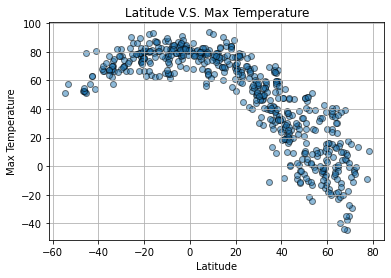

In [34]:
plt.scatter(latitude, max_temperature, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.grid(True)

plt.savefig("images/Latitude_vs_MaxTemperature.png")
# plt.savefig("Latitude_vs_MaxTemperature.png")
plt.show()


## Latitude vs. Humidity Plot

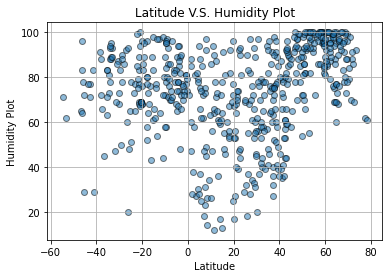

In [35]:
plt.scatter(latitude, humidity, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity Plot')

plt.grid(True)

plt.savefig("images/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

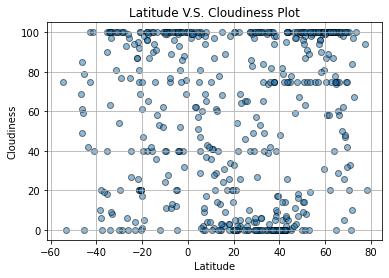

In [36]:
plt.scatter(latitude, clouds, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.grid(True)

plt.savefig("images/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

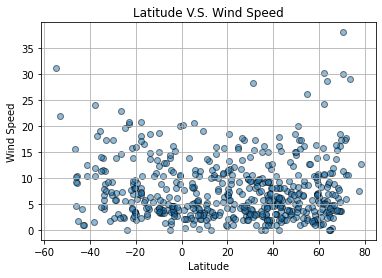

In [37]:
plt.scatter(latitude, wind_speed, marker='o', 
            linewidths=1, edgecolor='black', alpha=0.5)

plt.title('Latitude V.S. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.grid(True)

plt.savefig("images/Latitude_vs_Wind_Speed.png")
plt.show()